In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
from brokenaxes import brokenaxes
import seaborn as sns

from src.models import parameter_learning as lfi
from src.models import build_model as build
from src.models import model_schemata as schema
from src.models import inference as inf
from src.visualization import visualize as viz

In [3]:
os.chdir('/Users/magdalena/OneDrive - Queen Mary, University of London/bezzlab/research/projects/phospho_pi/')
# os.chdir('/home/mhuebner/Desktop/bezzlab/research/projects/phospho_pi/')

In [4]:
log_directory = 'models/ebdt_data/sub_network/p_model/'
mle_analysis, weights = lfi.analyze_and_store_logs(log_directory)

In [5]:
mle_analysis.keys()

dict_keys(['exp3-200i', 'exp2-200i', 'exp12-40i', 'exp8-10i', 'exp9-200i', 'exp8-200i', 'exp4-200i', 'exp8-40i', 'exp5-200i', 'exp1-200i', 'exp6-10i', 'exp6-40i', 'exp11-200i', 'exp10-200i', 'exp8-5i', 'exp6-5i', 'exp7-200i', 'exp6-200i'])

In [6]:
mle_scores = {}
# keys = list(mle_analysis.keys())
keys = ['exp1-200i', 'exp2-200i', 'exp3-200i', 'exp4-200i', 'exp5-200i', 'exp6-200i', 'exp8-200i', 'exp9-200i']
keys.sort()
for key in keys:
    mle_scores[key] = mle_analysis[key]['MLE scores']

#### Evaluation of learning process

Compare score after N iterations

In [ ]:
sns.reset_orig()
viz.plot_iteration_scores(mle_scores, xlim=(0, 100))

In [26]:
def custom_fit_plot_a(dataframes, xlim=None, ylim=None, secondary_keys=['exp4-200i', 'exp8-200i']):

    sns.set(style="whitegrid")  # Start with a white grid style

    # Save the current Seaborn settings
    current_context = sns.plotting_context()
    current_style = sns.axes_style()

    # Reset to Matplotlib defaults
    plt.rcdefaults()

    # Reapply the saved Seaborn settings except for the color palette
    sns.set_context(current_context)
    sns.set_style(current_style)

    fig, ax1 = plt.subplots(figsize=(8, 5), dpi=100)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color_map = {
        'exp4-200i': '#d62728',
        'exp8-200i': '#e377c2'  # you can change 'red' and 'blue' to any valid matplotlib color
    }

    for exp, df in dataframes.items():
        if 'Iteration' not in df.columns or 'Score' not in df.columns:
            print("Each DataFrame must contain 'Iteration' and 'Score' columns.")
            return
        
        # Select rows where iterations are within xlim
        if xlim is not None:
            df = df[(df['Iteration'] >= xlim[0]) & (df['Iteration'] <= xlim[1])]
        
        # Select rows where scores are within ylim
        if ylim is not None:
            df = df[(df['Score'] >= ylim[0]) & (df['Score'] <= ylim[1])]
        
        ax1.plot(df['Iteration'], df['Score'], marker='', linestyle='-', linewidth=1.5, label=exp.replace('-200i', ''))

        if exp in secondary_keys:
            ax2.plot(df['Iteration'], df['Score'], linestyle='--', linewidth=1.5, color = color_map.get(exp), label=exp.replace('-200i', ''))
        
            
    ax1.set_xlabel('Iteration', fontsize=14)
    ax1.set_ylabel('Log-likelihood', fontsize=14)
    ax2.set_ylabel('')  # we already handled the x-label with ax1

    # Increase the legibility of the ticks
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax2.tick_params(axis='both', which='major', labelsize=12)

    if ylim is not None:
        ax1.set_ylim(ylim)
    
    # Set axis limits if provided
    if xlim is not None:
        ax1.set_xlim(xlim)
    
    # Improve the grid, make it lighter
    ax1.grid(True, linestyle='--', linewidth=0.5)
    ax2.grid(False)
    
    ax1.legend(loc='lower right', fontsize=12)  # Add legends for each DataFrame
    ax2.legend(loc='upper right', fontsize=12)  # Add legends for each DataFrame

    plt.show()

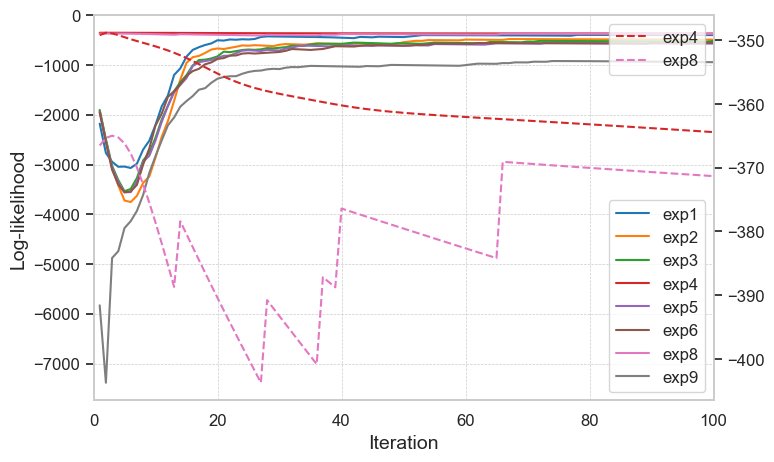

In [27]:
custom_fit_plot_a(mle_scores, xlim=(0, 100))

Compare time per iteration

In [28]:
keys = ['exp1-200i', 'exp2-200i', 'exp3-200i', 'exp4-200i', 'exp5-200i', 'exp6-200i', 'exp8-200i', 'exp9-200i', 'exp12-40i']
times_per_it = {}
compile_time = {}
for key in keys:
    # Remove -200i and -40i from the x-labels
    times_per_it[key] = mle_analysis[key]['Time per iteration'] / 60
    compile_time[key] = mle_analysis[key]['Compile Time'] / 60
    
# Convert your data to a suitable format for Seaborn
data = []
for key, time, compile_t in zip(keys, times_per_it.values(), compile_time.values()):
    data.append({'run': key.split('-')[0], 'times_per_it': time, 'compile_time': compile_t})

df = pd.DataFrame(data)

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(list(times_per_it.keys()), list(times_per_it.values()), color='skyblue')
plt.bar(list(compile_time.keys()), list(compile_time.values()), color='red')

plt.xlabel('Experiment')
plt.ylabel('Time per Iteration [min]')
plt.title('Bar Plot of Experiments')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure the labels fit within the figure boundaries

# Display the plot
plt.show()

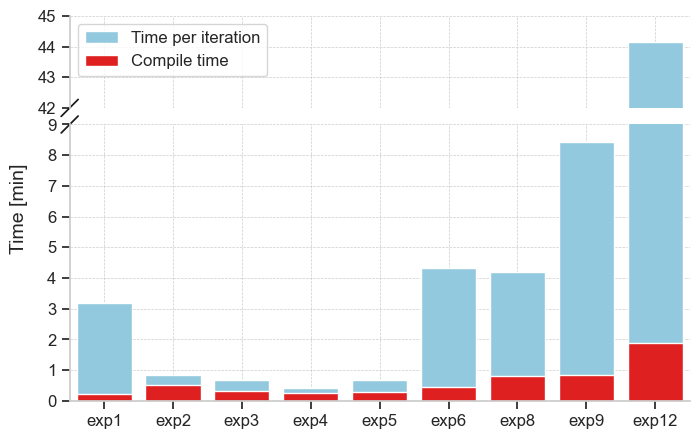

In [37]:
sns.reset_orig()
sns.set(style="whitegrid")

fig = plt.figure(figsize=(8, 5), dpi=100)
bax = brokenaxes(ylims=((0, 9), (42, 45)), hspace=0.09)

# Create bar plots using Seaborn on each broken axis
for ax in bax.axs:
    sns.barplot(x='run', y='times_per_it', data=df, color='skyblue', label='Time per iteration', ax=ax)
    sns.barplot(x='run', y='compile_time', data=df, color='red', label='Compile time', ax=ax)

# Set labels
for ax in bax.axs:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.tick_params(axis='both', which='major', labelsize=12)
bax.set_ylabel('Time [min]', fontsize=14)

# Add and position the legend
handles, labels = bax.axs[0].get_legend_handles_labels()
plt.legend(handles, labels, loc='upper left', fontsize='12')

# Improve the grid and despine for each subplot
for ax in bax.axs:
    ax.grid(True, linestyle='--', linewidth=0.5)
    # sns.despine(ax=ax, trim=False, left=True)

plt.show()


Compare maximum difference between consecutive iterations

In [38]:
# for every pair of consecutive iterations i i+1, I want to calculate the absolute difference between each of the weights, 
# then calculate the sum, the average and standard deviation of these differences and store them in a new dataframe
# then I want to plot the average difference for each iteration
max_diff = {}
# keys = list(weights.keys())
# keys.sort()
for key in keys:
    new_key = key.replace('-200i', '').replace('-40i', '')
    max_diff[new_key] = weights[key]['differences_df']

In [43]:
def custom_fit_plot_cd(dataframes, metric='Average Difference', xlim=None, ylim=None, title=None):
    
    sns.set(style="whitegrid")  # Start with a white grid style

    # Save the current Seaborn settings
    current_context = sns.plotting_context()
    current_style = sns.axes_style()

    # Reset to Matplotlib defaults
    plt.rcdefaults()

    # Reapply the saved Seaborn settings except for the color palette
    sns.set_context(current_context)
    sns.set_style(current_style)
    
    plt.figure(figsize=(8, 5), dpi=100)

    for exp, df in dataframes.items():
        
        # Select rows where iterations and metric values are within the specified limits
        if xlim is not None:
            df = df[(df['Iteration'] >= xlim[0]) & (df['Iteration'] <= xlim[1])]
        if ylim is not None:
            df = df[(df[metric] >= ylim[0]) & (df[metric] <= ylim[1])]

        sns.lineplot(x='Iteration', y=metric, data=df, label=exp, linewidth=1.5)

    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel(f'Parameters - {metric}', fontsize=14)

    # Set axis limits if provided
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    # Improve the grid, make it lighter
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Increase the legibility of the ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Set x-axis to display only integer ticks
    #plt.xticks(range(2, 101, 2))

    plt.legend(title=None, fontsize='12')

    plt.show()

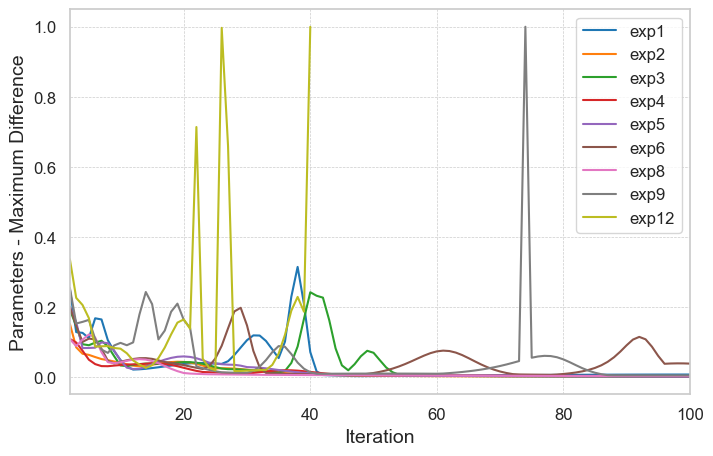

In [44]:
custom_fit_plot_cd(max_diff, metric='Maximum Difference', xlim=(2, 100))

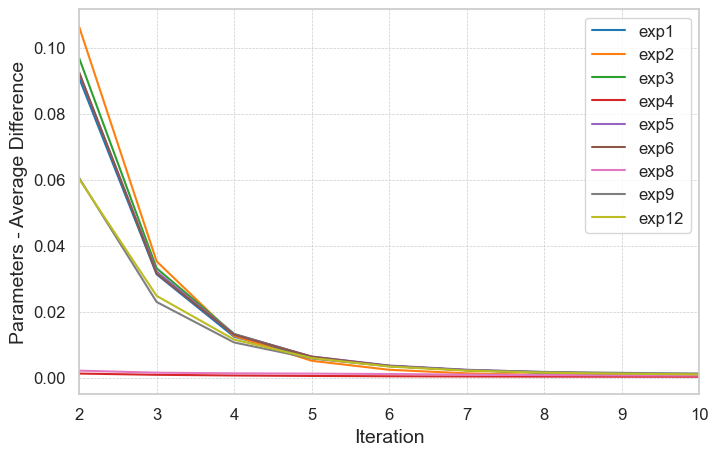

In [45]:
custom_fit_plot_cd(max_diff, metric='Average Difference', xlim=(2, 10))

#### Evaluation of learned parameters

In [7]:
experiments = ['exp1_200i', 'exp2_200i', 'exp3_200i', 'exp4_200i', 'exp5_200i', 'exp6_200i', 'exp7_200i', 'exp8_200i', 'exp9_200i', 'exp10_200i', 'exp11_200i', 'exp12_40i']
predicates = ['e_activity', 'occ_dec', 'occ_inc', 'p_occupancy']

In [10]:
result_dict = {}
for exp in experiments:
    # Example usage: Replace 'your_file_path.txt' with the actual file path
    file_path = f'models/ebdt_data/sub_network/p_model/p_model_{exp}.pl'
    result_dict[exp] = lfi.extract_params_from_model_file(file_path)
    #remove duplicates, keep last occurence
    for predicate, data in result_dict[exp].items():
        result_dict[exp][predicate] = lfi.learned_parameters_to_df(predicate, data).reset_index(drop=True)

In [48]:
experiments = ['exp1_200i', 'exp2_200i', 'exp3_200i', 'exp4_200i', 'exp5_200i', 'exp6_200i', 'exp7_200i', 'exp8_200i', 'exp10_200i', 'exp11_200i']

In [49]:
result_dict['exp5_200i']['p_occupancy_extrapol'] = result_dict['exp5_200i']['p_occupancy'].copy()
for exp in ['exp1_200i', 'exp2_200i', 'exp3_200i', 'exp4_200i']:
    result_dict[exp]['p_occupancy_extrapol'] = result_dict['exp5_200i']['p_occupancy'].copy()
    # Define the columns to copy
    columns_to_copy = ['p_dec', 'p_inc', 'p_base']
    # Define the number of rows to repeat the pattern
    pattern_rows = 4
    # Initialize an index variable
    index = 0

    # Loop through the rows of df1 and update specific columns from df2
    for i in range(len(result_dict[exp]['p_occupancy_extrapol'])):
        if i % pattern_rows == 0:
            index = 0  # Reset the index for each pattern
        result_dict[exp]['p_occupancy_extrapol'].loc[i, columns_to_copy] = result_dict[exp]['p_occupancy'].loc[index, columns_to_copy]
        index += 1

result_dict['exp6_200i']['p_occupancy_extrapol'] = result_dict['exp6_200i']['p_occupancy'].copy()
result_dict['exp7_200i']['p_occupancy_extrapol'] = result_dict['exp7_200i']['p_occupancy'].copy()
result_dict['exp8_200i']['p_occupancy_extrapol'] = result_dict['exp8_200i']['p_occupancy'].copy()
result_dict['exp10_200i']['p_occupancy_extrapol'] = result_dict['exp10_200i']['p_occupancy'].copy()
result_dict['exp11_200i']['p_occupancy_extrapol'] = result_dict['exp11_200i']['p_occupancy'].copy()

Average JSD per experiment pair
* calculate jsd for every pair where overlap. then calculate average to for similarity (matrix of experiments)
* calculate average jsd for individual predicates e.g. occupancy

In [50]:
predicates = ['e_activity', 'occ_dec', 'occ_inc', 'p_occupancy', 'p_occupancy_extrapol']

jsd_dict = {}

# Iterate over predicates
for pred in predicates:
    jsd_dict[pred] = lfi.compare_jsds(pred, experiments, result_dict)

In [51]:
predicates = ['e_activity', 'occ_dec', 'occ_inc', 'p_occupancy_extrapol']
average_jsd_matrix = viz.calc_average_jsd_heatmap(experiments, predicates, jsd_dict)

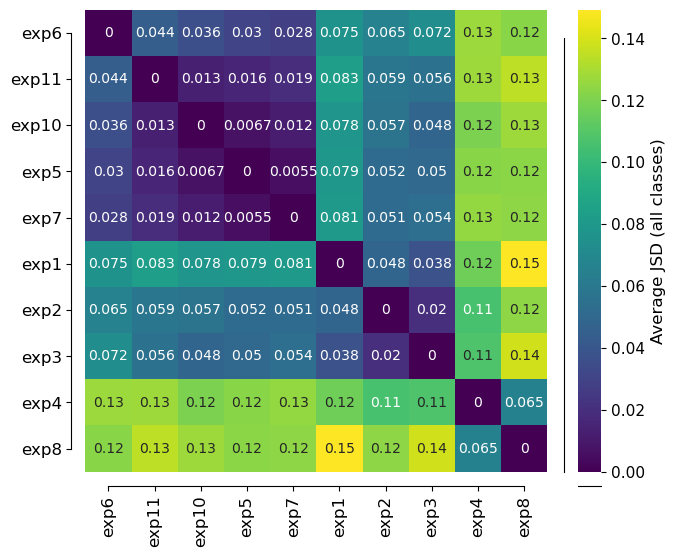

In [52]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(average_jsd_matrix)

In [53]:
e_activity_jsd_matrix = viz.calc_individual_predicate_jsd_heatmap(experiments, 'e_activity', jsd_dict)

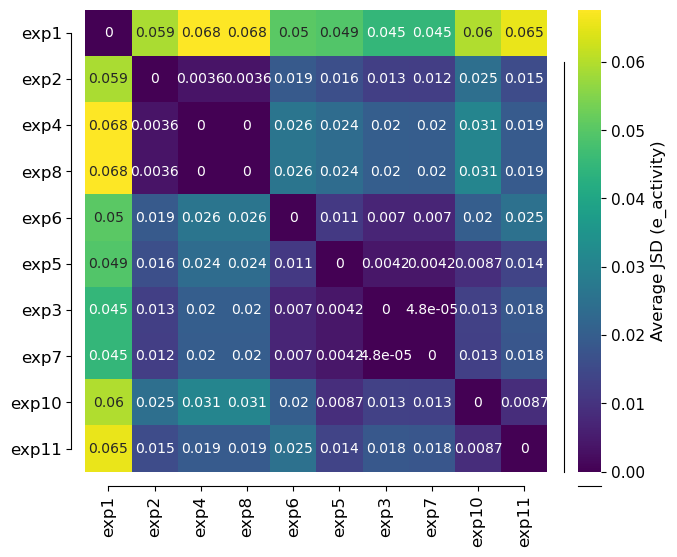

In [54]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(e_activity_jsd_matrix, score_type='Average JSD (e_activity)')

Average fraction of MaxMatch per experiment pair

In [55]:
experiments = ['exp1_200i', 'exp2_200i', 'exp3_200i', 'exp4_200i', 'exp5_200i', 'exp6_200i', 'exp7_200i', 'exp8_200i', 'exp10_200i', 'exp11_200i']
predicates = ['e_activity', 'occ_dec', 'occ_inc', 'p_occupancy', 'p_occupancy_extrapol']

max_dict = {}

# Iterate over predicates
for pred in predicates:
    max_dict[pred] = lfi.compare_max_categories(pred, experiments, result_dict)

In [56]:
predicates = ['e_activity', 'occ_dec', 'occ_inc', 'p_occupancy_extrapol']
average_overlap_matrix = viz.calc_average_overlap_heatmap(experiments, predicates, max_dict)

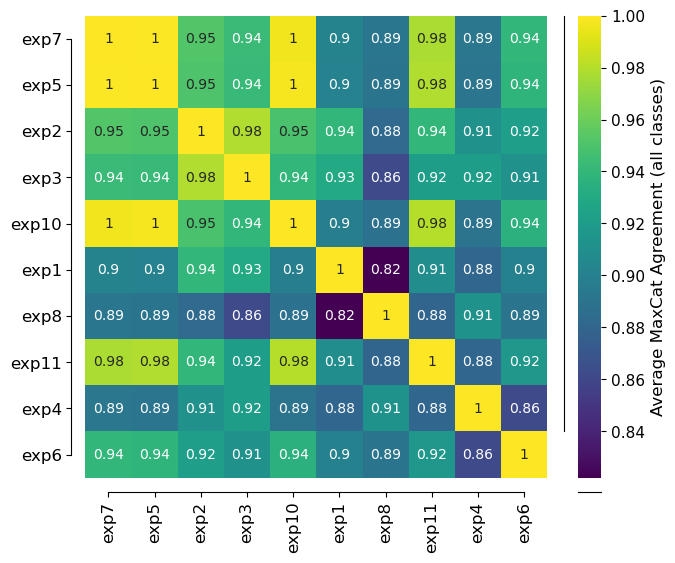

In [57]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(average_overlap_matrix, score_type='Average MaxCat Agreement (all classes)')

In [58]:
e_activity_overlap_matrix = viz.calc_individual_predicate_overlap_heatmap(experiments, 'e_activity', max_dict)

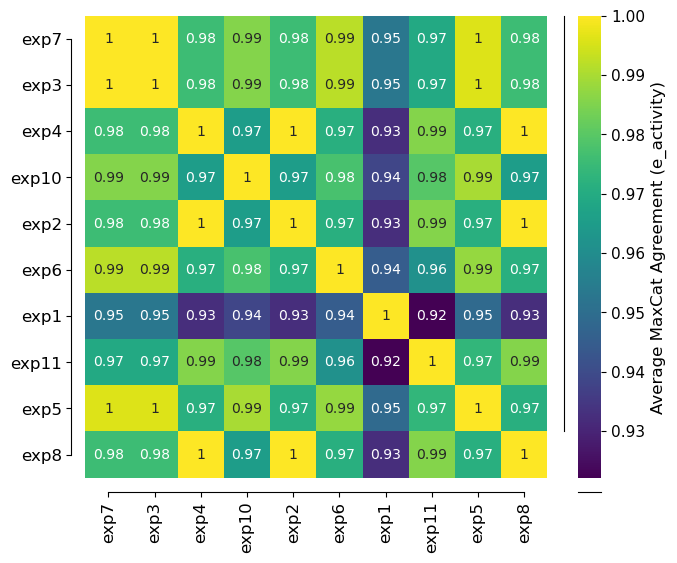

In [59]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(e_activity_overlap_matrix, score_type='Average MaxCat Agreement (e_activity)')

#### Compare AUC (all experiments)

In [4]:
e_ksea = pd.read_csv('data/processed/ebdt_data/sub_network_p/e_ksea.csv')
e_ksea_pen = pd.read_csv('data/processed/ebdt_data/sub_network_p/e_ksea_penalised.csv')

In [5]:
e_ksea['p_base'] = 1 - e_ksea['p_dec'] - e_ksea['p_inc']
e_ksea.loc[e_ksea['p_base'] < 0, 'p_base'] = 0


In [6]:
e_ksea_pen['p_base'] = 1 - e_ksea_pen['p_dec'] - e_ksea_pen['p_inc']
e_ksea_pen.loc[e_ksea_pen['p_base'] < 0, 'p_base'] = 0

In [116]:
analysis_dicts_0 = inf.prep_experiments_for_auc(result_dict, e_ksea, threshold=0)

AUC Plots

In [117]:
y_onehot_test_list_0 = []
y_score_list_0 = []
experiment_names = []
for exp in analysis_dicts_0.keys():
    y_onehot_test_list_0.append(analysis_dicts_0[exp]['y_onehot_test'])
    y_score_list_0.append(analysis_dicts_0[exp]['y_score'])
    experiment_names.append(exp)

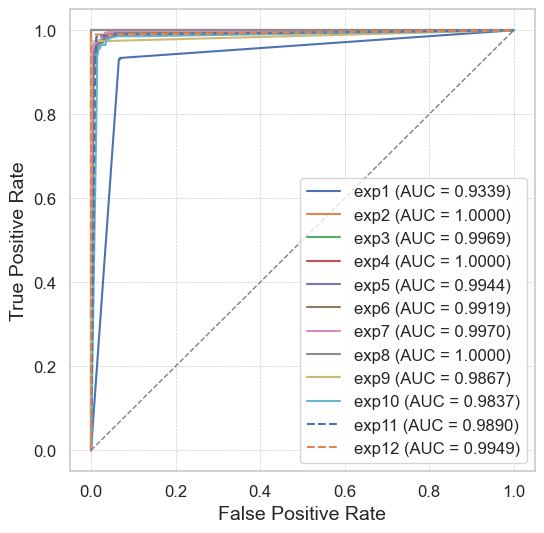

In [118]:
auc_df = viz.plot_micro_average_roc_seaborn(y_onehot_test_list_0, y_score_list_0, experiment_names)

In [119]:
analysis_dicts_80 = inf.prep_experiments_for_auc(result_dict, e_ksea, threshold=0.8)
y_onehot_test_list_80 = []
y_score_list_80 = []
experiment_names = []
for exp in analysis_dicts_80.keys():
    y_onehot_test_list_80.append(analysis_dicts_80[exp]['y_onehot_test'])
    y_score_list_80.append(analysis_dicts_80[exp]['y_score'])
    experiment_names.append(exp)

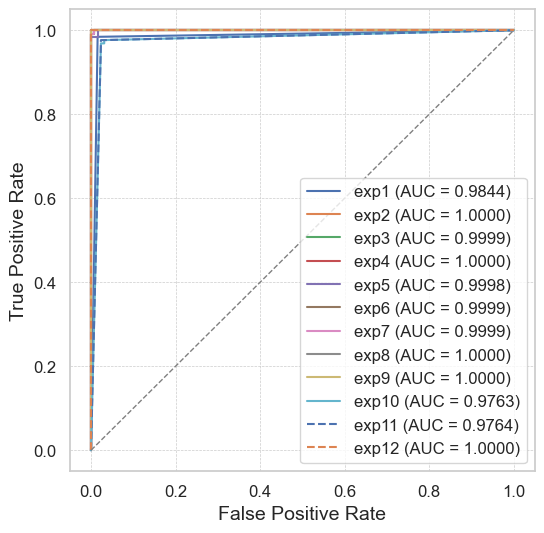

In [120]:
auc_df = viz.plot_micro_average_roc_seaborn(y_onehot_test_list_80, y_score_list_80, experiment_names)

#### Evaluation learned parameters: exp5 (ksea) vs exp10 (ksea pen)

In [123]:
# Extracting data from your analysis dictionary
x = analysis_dicts_0['exp5_200i']['analysis_dataframe']['prob']
y = analysis_dicts_0['exp5_200i']['analysis_dataframe']['JSD']
mask_no_match = analysis_dicts_0['exp5_200i']['analysis_dataframe']['MaxMatch'] == 0
mask_tc_lt_5 = (analysis_dicts_0['exp5_200i']['analysis_dataframe']['tc'] < 5) & mask_no_match

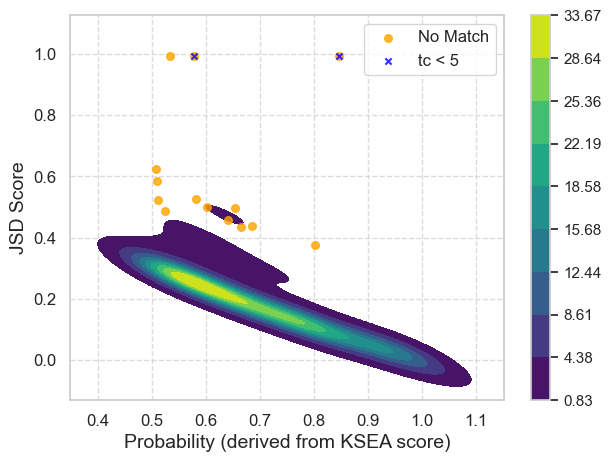

In [124]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x, y=y, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x[mask_no_match], y[mask_no_match], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from KSEA score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [127]:
analysis_dicts_pen = inf.prep_experiments_for_auc(result_dict, e_ksea_pen, threshold=0)

In [128]:
# Extracting data from your analysis dictionary
x_pen = analysis_dicts_pen['exp10_200i']['analysis_dataframe']['prob']
y_pen = analysis_dicts_pen['exp10_200i']['analysis_dataframe']['JSD']
mask_no_match_pen = analysis_dicts_pen['exp10_200i']['analysis_dataframe']['MaxMatch'] == 0
mask_tc_lt_5_pen = (analysis_dicts_pen['exp10_200i']['analysis_dataframe']['tc'] < 5) & mask_no_match_pen

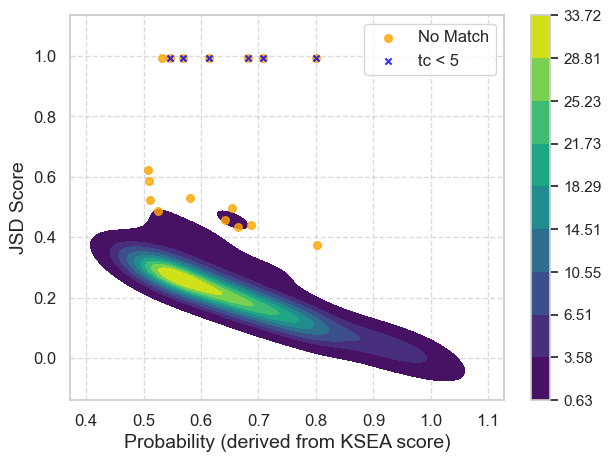

In [129]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x_pen, y=y_pen, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x_pen[mask_no_match_pen], y_pen[mask_no_match_pen], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
plt.scatter(x_pen[mask_tc_lt_5_pen], y_pen[mask_tc_lt_5_pen], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from KSEA score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [130]:
# Data extraction
data1 = analysis_dicts_0['exp5_200i']['analysis_dataframe']['JSD']
data2 = analysis_dicts_pen['exp10_200i']['analysis_dataframe']['JSD']  # Assuming you also want to plot this dataset

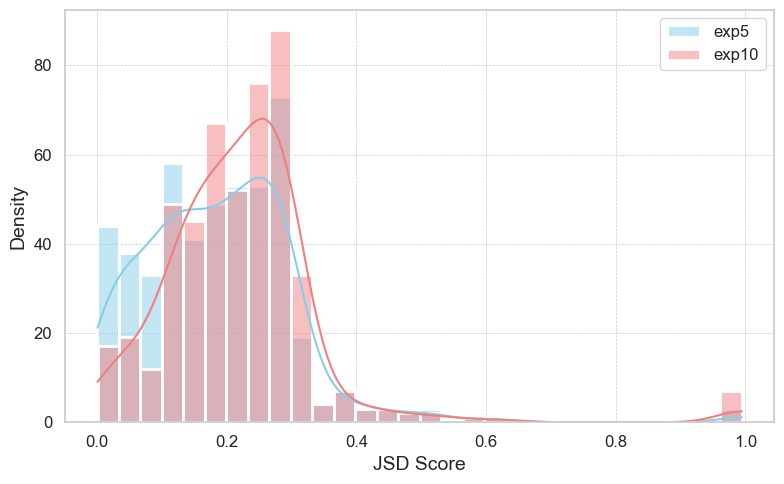

In [131]:
# Set a theme for seaborn for a nicer look
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(8, 5))

# Plot the KDE for data1
sns.histplot(data1, bins=30, kde=True, color='skyblue', linewidth=2, label='exp5')

# Plot the KDE for data2
sns.histplot(data2, bins=30, kde=True, color='lightcoral', linewidth=2, label='exp10')  # Change color and label as appropriate

# Add titles, labels, and legend
plt.xlabel('JSD Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

#### Evaluation pf learned interactions

In [10]:
targets_dict = {k: v for k, v in result_dict.items() if 'targets' in v.keys()}

NameError: name 'result_dict' is not defined

In [ ]:
targets_dict.keys()

dict_keys(['exp6_200i', 'exp7_200i', 'exp8_200i', 'exp12_40i'])

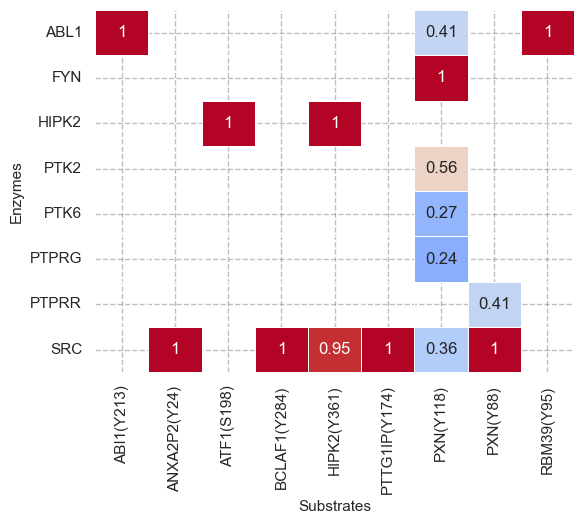

In [142]:
pivot_df = targets_dict['exp6_200i']['targets'].pivot(index='enzyme', columns='substrate', values='probability')
viz.plot_targets_heatmap(pivot_df)

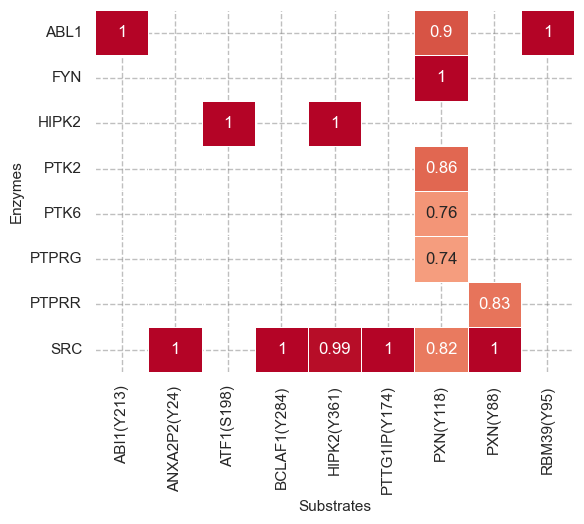

In [143]:
pivot_df = targets_dict['exp7_200i']['targets'].pivot(index='enzyme', columns='substrate', values='probability')
viz.plot_targets_heatmap(pivot_df)

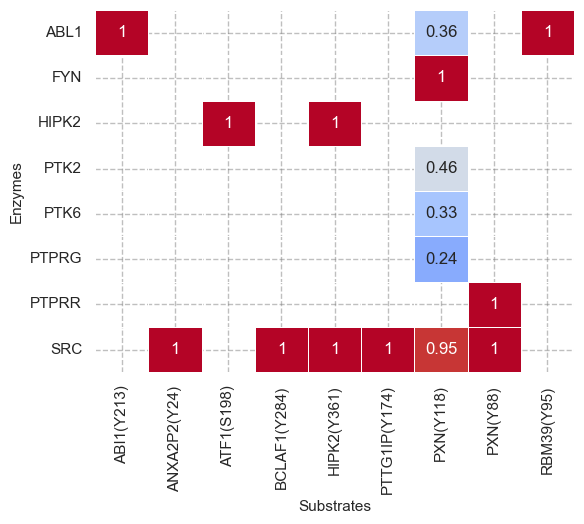

In [144]:
pivot_df = targets_dict['exp8_200i']['targets'].pivot(index='enzyme', columns='substrate', values='probability')
viz.plot_targets_heatmap(pivot_df)

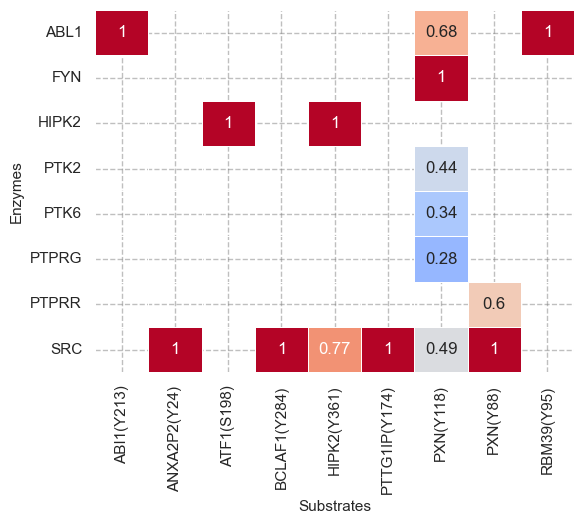

In [145]:
pivot_df = targets_dict['exp12_40i']['targets'].pivot(index='enzyme', columns='substrate', values='probability')
viz.plot_targets_heatmap(pivot_df)

Exp 8: different N iterations

In [11]:
experiments = ['exp8_40i', 'exp8_10i', 'exp8_5i']
predicates = ['e_activity', 'occ_dec', 'occ_inc', 'p_occupancy']

In [12]:
result_dict_exp8 = {}
for exp in experiments:
    # Example usage: Replace 'your_file_path.txt' with the actual file path
    file_path = f'models/ebdt_data/sub_network/p_model/p_model_{exp}.pl'
    result_dict_exp8[exp] = lfi.extract_params_from_model_file(file_path)
    #remove duplicates, keep last occurence
    for predicate, data in result_dict_exp8[exp].items():
        result_dict_exp8[exp][predicate] = lfi.learned_parameters_to_df(predicate, data).reset_index(drop=True)

In [13]:
targets_dict_exp8 = {k: v for k, v in result_dict_exp8.items() if 'targets' in v.keys()}

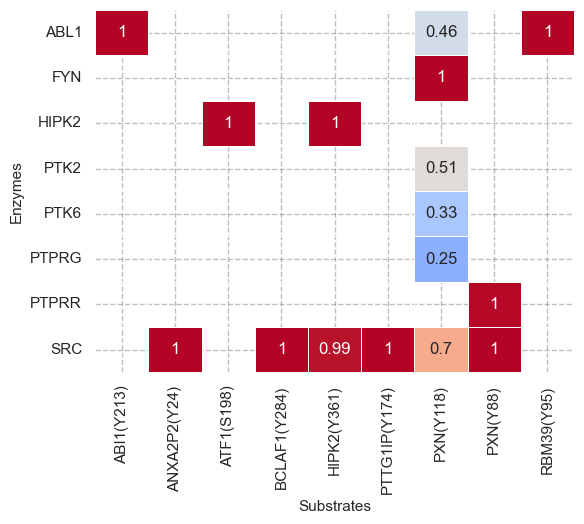

In [14]:
pivot_df = targets_dict_exp8['exp8_40i']['targets'].pivot(index='enzyme', columns='substrate', values='probability')
viz.plot_targets_heatmap(pivot_df)

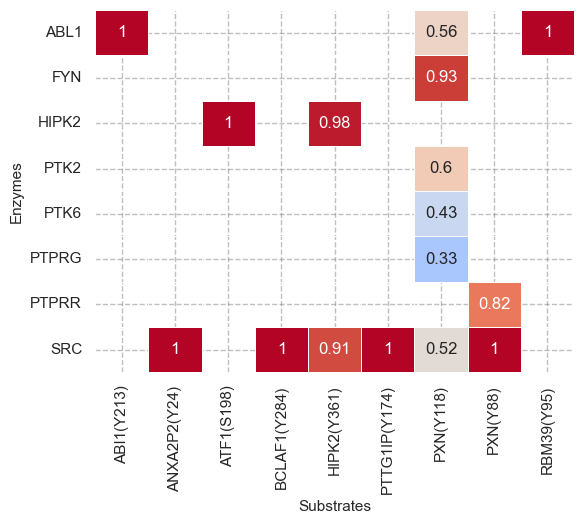

In [15]:
pivot_df = targets_dict_exp8['exp8_10i']['targets'].pivot(index='enzyme', columns='substrate', values='probability')
viz.plot_targets_heatmap(pivot_df)

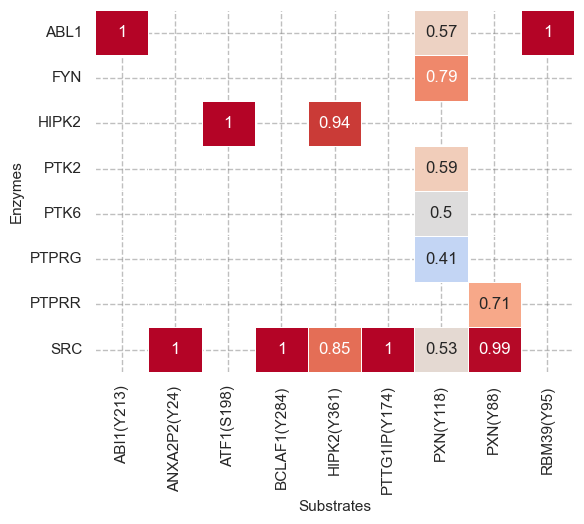

In [16]:
pivot_df = targets_dict_exp8['exp8_5i']['targets'].pivot(index='enzyme', columns='substrate', values='probability')
viz.plot_targets_heatmap(pivot_df)

Exp 6: different N iterations

In [17]:
experiments = ['exp6_40i', 'exp6_10i', 'exp6_5i']
predicates = ['e_activity', 'occ_dec', 'occ_inc', 'p_occupancy']

In [18]:
result_dict_exp6 = {}
for exp in experiments:
    # Example usage: Replace 'your_file_path.txt' with the actual file path
    file_path = f'models/ebdt_data/sub_network/p_model/p_model_{exp}.pl'
    result_dict_exp6[exp] = lfi.extract_params_from_model_file(file_path)
    #remove duplicates, keep last occurence
    for predicate, data in result_dict_exp6[exp].items():
        result_dict_exp6[exp][predicate] = lfi.learned_parameters_to_df(predicate, data).reset_index(drop=True)

In [19]:
result_dict_exp6 = {k: v for k, v in result_dict_exp6.items() if 'targets' in v.keys()}

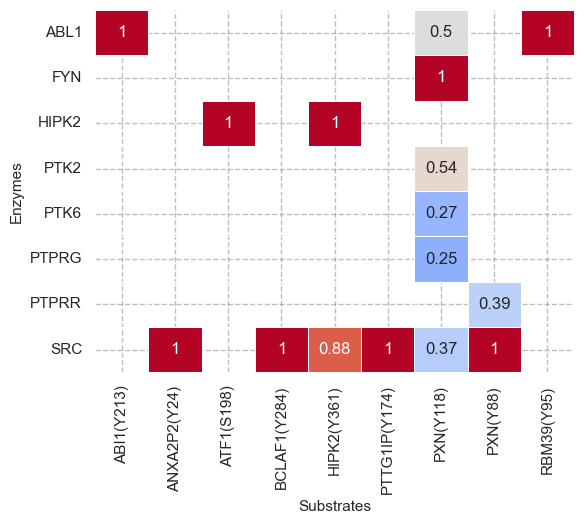

In [20]:
pivot_df = result_dict_exp6['exp6_40i']['targets'].pivot(index='enzyme', columns='substrate', values='probability')
viz.plot_targets_heatmap(pivot_df)

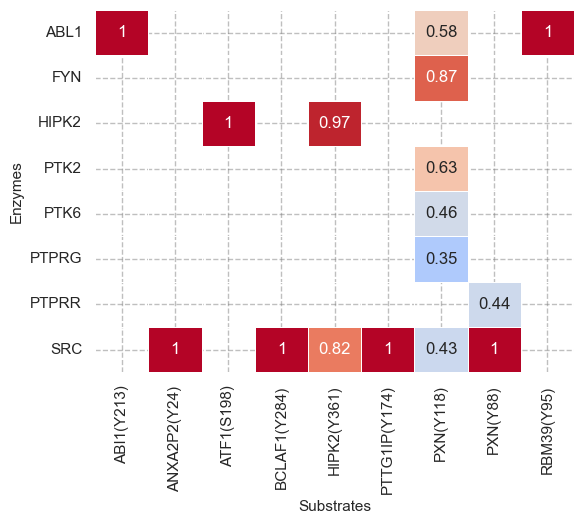

In [21]:
pivot_df = result_dict_exp6['exp6_10i']['targets'].pivot(index='enzyme', columns='substrate', values='probability')
viz.plot_targets_heatmap(pivot_df)

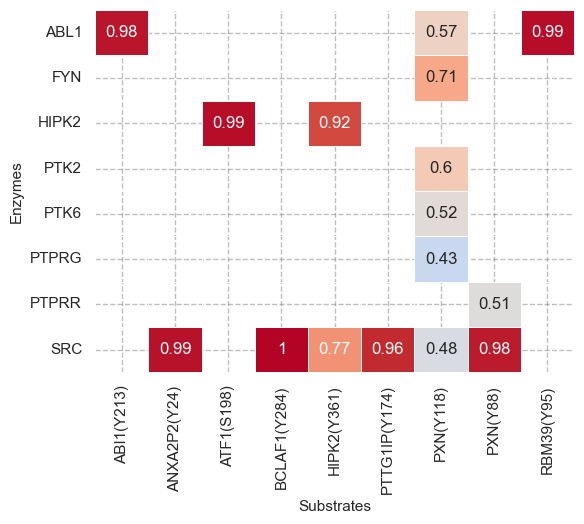

In [22]:
pivot_df = result_dict_exp6['exp6_5i']['targets'].pivot(index='enzyme', columns='substrate', values='probability')
viz.plot_targets_heatmap(pivot_df)